
## The Data

### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


# Exploratory Data Analysis

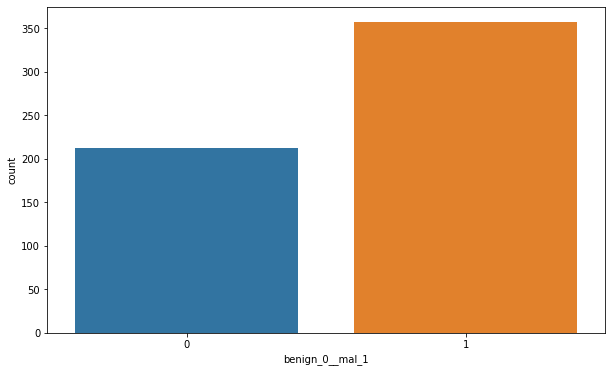

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(x='benign_0__mal_1', data = df);

In [9]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


<AxesSubplot:>

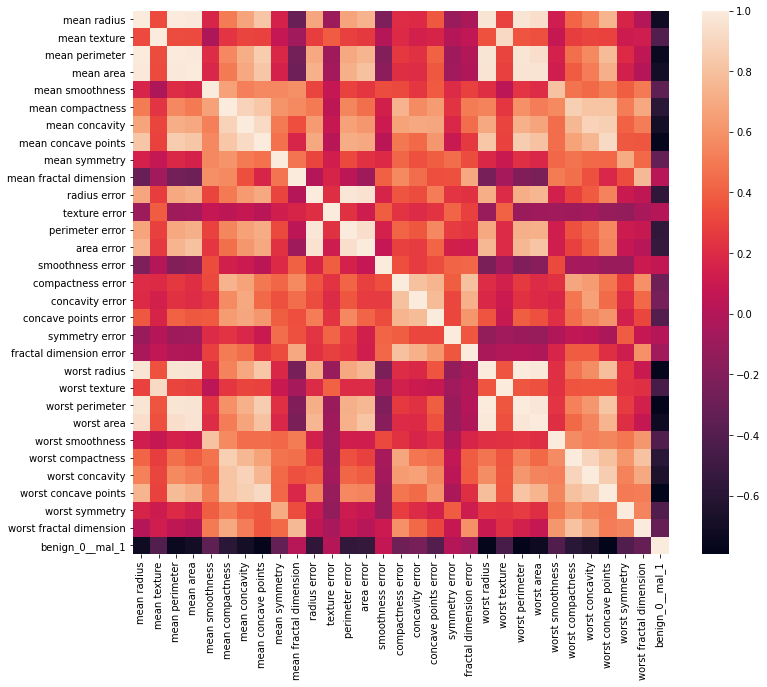

In [20]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr())

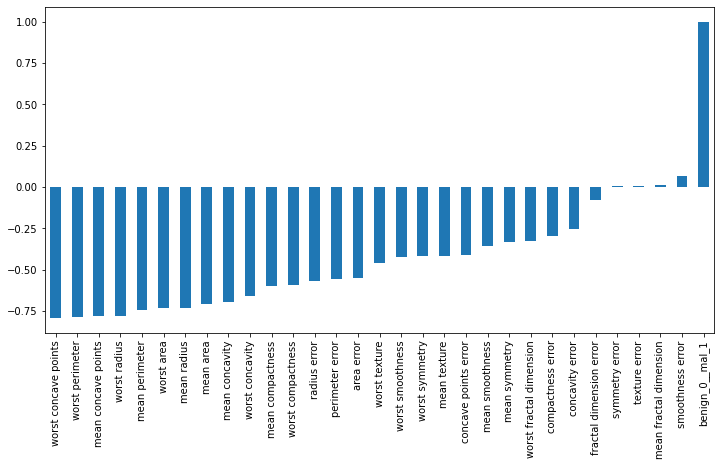

In [14]:
plt.figure(figsize=(12,6))
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar');

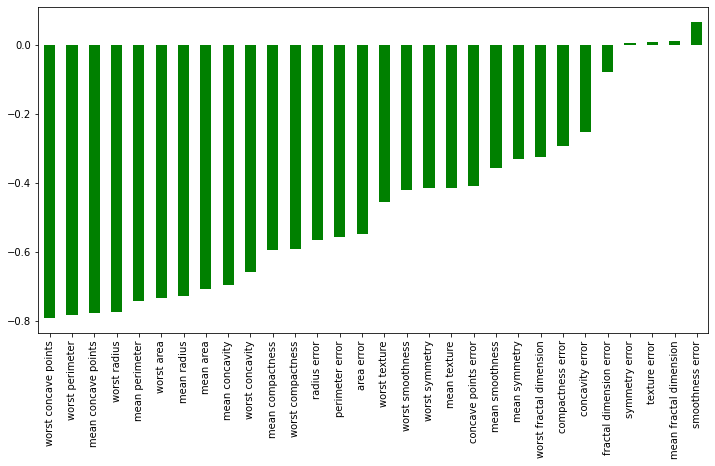

In [19]:
plt.figure(figsize=(12,6))
df.corr()['benign_0__mal_1'].sort_values()[:-1].plot(kind='bar',color='g');

## Train Test Split


In [21]:
X = df.drop('benign_0__mal_1',axis = 1).values
y= df['benign_0__mal_1'].values

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

## Scaling Data

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()

In [26]:
X_train = scaler.fit_transform(X_train)

In [28]:
X_test = scaler.transform(X_test)

---------------------------------------
## Creating the Model


In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [30]:
X_train.shape

(426, 30)

In [31]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))

model.add(Dense(15, activation = 'relu'))

# BINARY CLASSIFICATION
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

## Training the Model 

### Example One: Choosing too many epochs and overfitting!

In [32]:
model.fit(x=X_train, y = y_train, epochs = 600, validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 1s 12ms/step - loss: 0.6895 - val_loss: 0.6701
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6539 - val_loss: 0.6322
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6075 - val_loss: 0.5765
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5552 - val_loss: 0.5253
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5041 - val_loss: 0.4730
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4524 - val_loss: 0.4196
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4015 - val_loss: 0.3693
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3588 - val_loss: 0.3262
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3232 - val_loss: 0.2986
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.2927 - val_loss: 0.2654
Epoch 11

In [33]:
losses = pd.DataFrame(model.history.history)

In [34]:
losses

,loss,val_loss
0,0.689450,0.670146
1,0.653940,0.632239
2,0.607457,0.576516
3,0.555207,0.525339
4,0.504089,0.472970
...,...,...
595,0.017123,0.178167
596,0.021033,0.200880
597,0.016644,0.181647
598,0.016781,0.200735


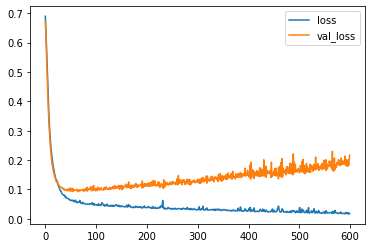

In [37]:
losses.plot();

------------------------------------------

    In the beginning, during the first couple of epochs, both validation and trading loss are both decreasing. That means the training data haven't yet overfit. And as it goes along, there is a decreasing loss in both the validation set and the training set.

    However, at a certain point in time, notice that the training loss here in blue is still going down. However, the validation loss is beginning to increase. That basically tells that there is an overfitting to the training data set.

    So there is a clear indication here that the training just for too many epochs since the validation loss gets worse and worse after these epochs. Early stopping can be used since it's trained too much.

------------------------------------------

## Example Two: Early Stopping


In [38]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

Stop training when a monitored quantity has stopped improving.

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{"auto", "min", "max"}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.

In [40]:
# for loss mode is 'min', since minimizing the loss is the goal.

early_stop = EarlyStopping(monitor='val_loss', mode = 'min', verbose = 1, patience = 25)

In [42]:
model.fit(x = X_train, y= y_train, epochs = 600, validation_data = (X_test,y_test), callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6577 - val_loss: 0.6379
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6169 - val_loss: 0.5961
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5732 - val_loss: 0.5527
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5272 - val_loss: 0.5012
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4775 - val_loss: 0.4490
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4294 - val_loss: 0.3982
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3822 - val_loss: 0.3539
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3428 - val_loss: 0.3114
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3059 - val_loss: 0.2804
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2775 - val_loss: 0.2492
Epoch 11

In [48]:
model_loss = pd.DataFrame(model.history.history)
model_loss

,loss,val_loss
0,0.657746,0.637862
1,0.616855,0.596095
2,0.573180,0.552743
3,0.527222,0.501217
4,0.477546,0.448999
...,...,...
65,0.052022,0.101377
66,0.058681,0.110521
67,0.052997,0.104920
68,0.052113,0.103346


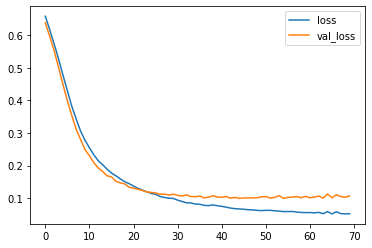

In [46]:
model_loss.plot();

## Example Three: Adding in DropOut Layers


    In the example below Dropout is applied between the two hidden layers and between the last hidden layer and the output layer. Again a dropout rate of 50% is used as is a weight constraint on those layers.

In [51]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(15, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [52]:
model.fit(x = X_train, y= y_train, epochs = 600, validation_data=(X_test,y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.7099 - val_loss: 0.6756
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6808 - val_loss: 0.6547
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6526 - val_loss: 0.6337
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6545 - val_loss: 0.6105
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6265 - val_loss: 0.5899
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6150 - val_loss: 0.5688
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5970 - val_loss: 0.5466
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5644 - val_loss: 0.5204
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5666 - val_loss: 0.4941
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5398 - val_loss: 0.4625
Epoch 11/

In [53]:
model_loss2 = pd.DataFrame(model.history.history)
model_loss2

,loss,val_loss
0,0.709947,0.675618
1,0.680820,0.654673
2,0.652603,0.633686
3,0.654469,0.610486
4,0.626504,0.589914
...,...,...
124,0.077550,0.102004
125,0.074775,0.099586
126,0.079121,0.091256
127,0.078505,0.107579


<AxesSubplot:>

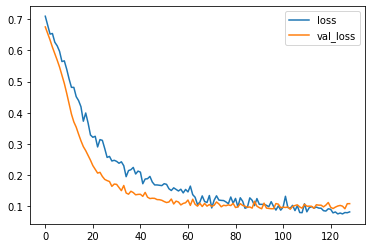

In [54]:
model_loss2.plot()

# Model Evaluation


In [56]:
predictions = model.predict_classes(X_test)

In [57]:
from sklearn.metrics import classification_report, confusion_matrix

In [58]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [59]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 3 85]]
